In [ ]:
# ==========================
# 1. Veri Yükleme
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_prep import load_data, basic_clean
from src.features import build_patient_history

# Veriyi yükle
df = load_data("data/raw/no_show_dataset.csv")
df = basic_clean(df)
df = build_patient_history(df)

df.head()


C:\Users\emira\Desktop\no_show_project\src\features.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0.0)


,appointment_id,patient_id,scheduled_timestamp,appointment_timestamp,created_channel,department,doctor_id,age,sex,neighborhood,...,previous_appointments,previous_noshow,target_noshow,lead_time_days,dow,hour,dow_hour,past_appointments_patient,past_noshow_count,historical_noshow_rate_patient
115,A00116,P0001,2025-10-29 09:00:00,2025-12-23 09:00:00,CallCenter,Pediatrics,D04,29,M,Rural,...,7,1,0,55.0,1,9,1_9,0,0.0,0.0
413,A00414,P0002,2026-05-13 14:00:00,2026-07-12 14:00:00,CallCenter,Pediatrics,D31,87,M,North,...,8,6,0,60.0,6,14,6_14,0,0.0,0.0
243,A00244,P0002,2026-10-22 13:00:00,2026-11-10 13:00:00,CallCenter,Gynecology,D15,43,F,Central,...,7,7,1,19.0,1,13,1_13,1,0.0,0.0
323,A00324,P0002,2026-11-06 17:00:00,2026-12-30 17:00:00,Online,Orthopedics,D28,64,F,South,...,2,2,0,54.0,2,17,2_17,2,1.0,0.5
155,A00156,P0003,2027-09-04 14:00:00,2027-11-02 14:00:00,Onsite,Gynecology,D35,56,F,West,...,0,0,0,59.0,1,14,1_14,0,0.0,0.0


In [27]:
# ==========================
# 2. Veri Keşfi (EDA)
# ==========================

print("📌 Veri Boyutu:", df.shape)

print("\n📌 Sütunlar:")
print(df.columns.tolist())

print("\n📌 Eksik Değer Sayıları:")
print(df.isnull().sum())

print("\n📌 Sayısal Sütun Özet İstatistikleri:")
df.describe()


📌 Veri Boyutu: (500, 22)

📌 Sütunlar:
['appointment_id', 'patient_id', 'scheduled_timestamp', 'appointment_timestamp', 'created_channel', 'department', 'doctor_id', 'age', 'sex', 'neighborhood', 'insurance_type', 'sms_received', 'previous_appointments', 'previous_noshow', 'target_noshow', 'lead_time_days', 'dow', 'hour', 'dow_hour', 'past_appointments_patient', 'past_noshow_count', 'historical_noshow_rate_patient']

📌 Eksik Değer Sayıları:
appointment_id                      0
patient_id                          0
scheduled_timestamp                 0
appointment_timestamp               0
created_channel                     0
department                          0
doctor_id                           0
age                                 0
sex                                 0
neighborhood                        0
insurance_type                    154
sms_received                        0
previous_appointments               0
previous_noshow                     0
target_noshow           

,scheduled_timestamp,appointment_timestamp,age,sms_received,previous_appointments,previous_noshow,target_noshow,lead_time_days,dow,hour,past_appointments_patient,past_noshow_count,historical_noshow_rate_patient
count,500,500,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2026-11-24 15:46:04.800000,2026-12-24 06:15:50.400000256,44.786000,0.690000,4.75600,2.300000,0.274000,29.604000,2.908000,12.504000,0.514000,0.138000,0.104333
min,2025-10-12 15:00:00,2025-12-01 09:00:00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,2026-05-10 02:45:00,2026-06-08 16:00:00,24.750000,0.000000,2.00000,0.000000,0.000000,15.000000,1.000000,10.000000,0.000000,0.000000,0.000000
50%,2026-12-05 09:30:00,2026-12-31 13:30:00,44.500000,1.000000,5.00000,1.000000,0.000000,28.000000,3.000000,13.000000,0.000000,0.000000,0.000000
75%,2027-06-08 14:00:00,2027-07-01 19:15:00,65.000000,1.000000,8.00000,4.000000,1.000000,47.000000,5.000000,15.000000,1.000000,0.000000,0.000000
max,2027-12-16 08:00:00,2027-12-30 17:00:00,90.000000,1.000000,10.00000,10.000000,1.000000,60.000000,6.000000,17.000000,4.000000,2.000000,1.000000
std,NaN,NaN,25.276194,0.462956,3.26094,2.482403,0.446456,17.873839,2.029723,2.996655,0.779114,0.373141,0.287134


In [28]:
# ============================
# 2. Eksik Değer Temizleme
# ============================

print("Insurance_type eksik sayısı:", df["insurance_type"].isnull().sum())

# Eksik olan sigorta tiplerini "Unknown" olarak dolduruyoruz
df["insurance_type"] = df["insurance_type"].fillna("Unknown")

print("Doldurulduktan sonra eksik sayısı:", df["insurance_type"].isnull().sum())


Insurance_type eksik sayısı: 154
Doldurulduktan sonra eksik sayısı: 0


In [29]:
categorical_cols = [
    "appointment_id", "patient_id", "created_channel", "department",
    "doctor_id", "sex", "neighborhood", "insurance_type", "dow_hour"
]

numerical_cols = [
    "age", "lead_time_days", "previous_appointments", "previous_noshow",
    "past_appointments_patient", "past_noshow_count",
    "historical_noshow_rate_patient"
]

print("Kategori kolonlar:", categorical_cols)
print("Sayısal kolonlar:", numerical_cols)


Kategori kolonlar: ['appointment_id', 'patient_id', 'created_channel', 'department', 'doctor_id', 'sex', 'neighborhood', 'insurance_type', 'dow_hour']
Sayısal kolonlar: ['age', 'lead_time_days', 'previous_appointments', 'previous_noshow', 'past_appointments_patient', 'past_noshow_count', 'historical_noshow_rate_patient']


In [30]:
# ============================
# 4. Train–Test Split
# ============================
from sklearn.model_selection import train_test_split

X = df[numerical_cols + categorical_cols]
y = df["target_noshow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train boyutu:", X_train.shape)
print("Test boyutu:", X_test.shape)


Train boyutu: (400, 16)
Test boyutu: (100, 16)


In [31]:
# ============================
# 5. Preprocessing Pipeline
# ============================
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'lead_time_days',
                                  'previous_appointments', 'previous_noshow',
                                  'past_appointments_patient',
                                  'past_noshow_count',
                                  'historical_noshow_rate_patient']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['appointment_id', 'patient_id',
                                  'created_channel', 'department', 'doctor_id',
                                  'sex', 'neighborhood', 'insurance_type',
                                  'dow_hour'])])

In [32]:
# ============================
# 6. Logistic Regression Modeli
# ============================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=1000))
])

lr_model.fit(X_train, y_train)

# Tahmin
y_pred_lr = lr_model.predict(X_test)

print("📌 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


📌 Logistic Regression Accuracy: 0.7

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82        73
           1       0.29      0.07      0.12        27

    accuracy                           0.70       100
   macro avg       0.51      0.50      0.47       100
weighted avg       0.61      0.70      0.63       100


📌 Confusion Matrix:
 [[68  5]
 [25  2]]


In [33]:
# ============================
# 7. Random Forest Modeli
# ============================

from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

rf_model.fit(X_train, y_train)

# Tahmin
y_pred_rf = rf_model.predict(X_test)

print("📌 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


📌 Random Forest Accuracy: 0.73

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        73
           1       0.00      0.00      0.00        27

    accuracy                           0.73       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.53      0.73      0.62       100


📌 Confusion Matrix:
 [[73  0]
 [27  0]]


c:\Users\emira\Desktop\no_show_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emira\Desktop\no_show_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emira\Desktop\no_show_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

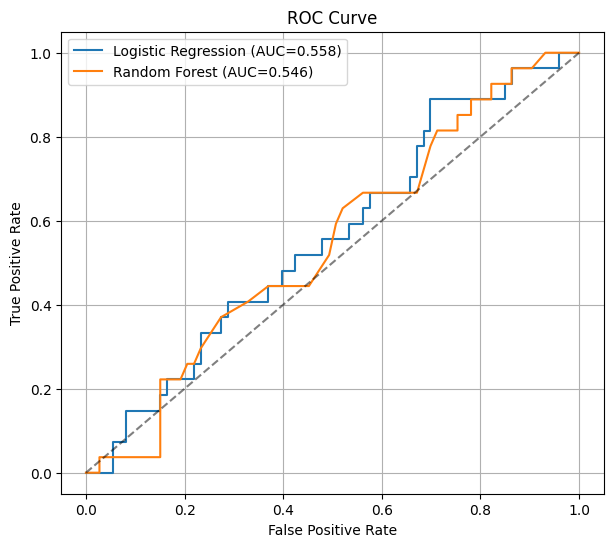

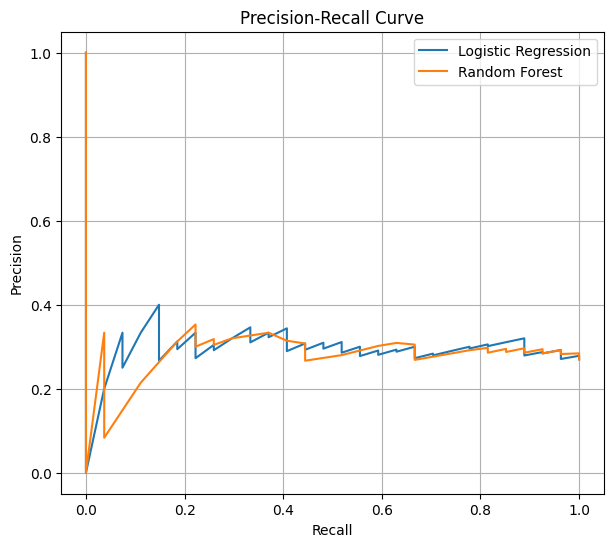

In [34]:
# ============================
# 8. ROC – AUC ve PR – AUC Karşılaştırması
# ============================

from sklearn.metrics import roc_curve, auc, precision_recall_curve

# === Logistic Regression Prob ===
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# === Random Forest Prob ===
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


# === ROC Curve ===
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc(fpr_lr, tpr_lr):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc(fpr_rf, tpr_rf):.3f})")

plt.plot([0,1], [0,1], "k--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


# === Precision-Recall Curve ===
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,6))
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_rf, precision_rf, label="Random Forest")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [35]:
import joblib
import os

os.makedirs("models", exist_ok=True)

model_path = "models/rf_model.pkl"
joblib.dump(rf_model, model_path)

print("🔥 Model kaydedildi:", model_path)


🔥 Model kaydedildi: models/rf_model.pkl
